In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/class_machinelearning

/content/drive/My Drive/class_machinelearning


In [0]:
import numpy as np
import random 
import matplotlib.pyplot as plt

## INPUT DATA
## data.csv에서 data를 받아와서 그리기

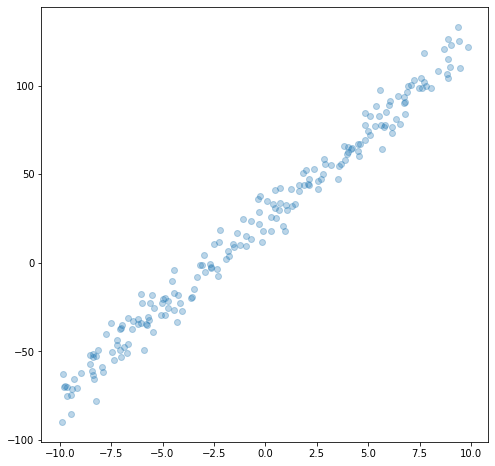

In [4]:
## check the data
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3)
plt.show()

#Plot the 3d energy surface


Hypothesis 
$$h_\theta(x)=\theta_0+\theta_1(x)$$

Objective funtion(cost function)
$$
J(\theta)=\frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)})−y^{(i)})^2
$$

In [0]:
x = x_data
y = y_data
x_axis = np.arange(-30, 30, 0.1)

theta0 = np.arange(-30, 30, 0.1)
theta1 = np.arange(-30, 30, 0.1)
theta0, theta1 = np.meshgrid(theta0, theta1)

## hypothesis
def h(th0, th1):
    hypo = th0 + th1*(x)
    return hypo

## cost function
def J(th0, th1):
    cost = (1/(2*len(x)))*np.sum((h(th0, th1)-y)**2)
    return cost

## energy surface (600,600)=> 2 dimension
e_temp = np.array([J(ax_theta0, ax_theta1) for ax_theta0, ax_theta1 in zip(np.ravel(theta0), np.ravel(theta1))])
E = e_temp.reshape(600,600)



## GD Algorithm for linear regression
$$
\theta_0^{(t+1)} : = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
$$
$$
\theta_1^{(t+1)} : = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$$

In [32]:

# list for graph 
list_th0 = []
list_th1 = []

## settings for GD algorithm
itr = np.arange(700)+1
th0 = -30
th1 = -30  
a = 0.01

### GD Algorithm - PATH
## performing gd algorithm for linear regression 

for iteration in np.ndenumerate(itr):
    temp0 = th0 - a *(1/len(x_data))*np.sum((h(th0, th1)-y))
    temp1 = th1 - a *(1/len(x_data))*np.sum((h(th0, th1)-y)*(x))
    th0 = temp0
    th1 = temp1
  
    list_th0.append(th0)
    list_th1.append(th1)

    print("iteration : ", iteration)
    print("theta0 : ", th0, "theta1 : ", th1)

#e_temp = np.array([J(ax_theta0, ax_theta1) for ax_theta0, ax_theta1 in zip(np.ravel(theta0), np.ravel(theta1))])

path_temp = np.array([J(ax_theta0, ax_theta1) for ax_theta0, ax_theta1 in zip(list_th0,list_th1)])
#print(path_temp)
Z = path_temp

X = list_th0
Y = list_th1



iteration :  ((0,), 1)
theta0 :  -29.6455590365 theta1 :  -17.23152148802281
iteration :  ((1,), 2)
theta0 :  -29.232431618262403 theta1 :  -8.629401073775709
iteration :  ((2,), 3)
theta0 :  -28.781510558226504 theta1 :  -2.8333052491632555
iteration :  ((3,), 4)
theta0 :  -28.306849763326266 theta1 :  1.0729364219118729
iteration :  ((4,), 5)
theta0 :  -27.81789738044501 theta1 :  3.706355260753071
iteration :  ((5,), 6)
theta0 :  -27.320999794808472 theta1 :  5.482515568980271
iteration :  ((6,), 7)
theta0 :  -26.820414555255095 theta1 :  6.68129574737662
iteration :  ((7,), 8)
theta0 :  -26.318992566989817 theta1 :  7.4911911808898175
iteration :  ((8,), 9)
theta0 :  -25.818637539516637 theta1 :  8.039151761228053
iteration :  ((9,), 10)
theta0 :  -25.320615418315885 theta1 :  8.410677141491638
iteration :  ((10,), 11)
theta0 :  -24.825762782182778 theta1 :  8.663350676789152
iteration :  ((11,), 12)
theta0 :  -24.33462719502778 theta1 :  8.835954389542305
iteration :  ((12,), 13)


Text(0.5, 0, 'theta0')

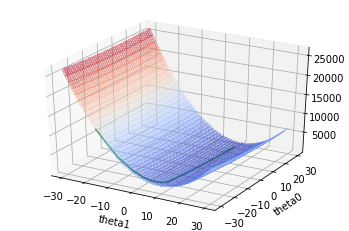

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')


# Plot the surface.
ax.plot_surface(theta1, theta0, E, cmap=cm.coolwarm,
                       alpha=0.3, linewidth=0, antialiased=False)

## plot 3d-line
ax.plot(Y, X, Z, label='parametric curve', color = 'green' )



ax.set_xlabel("theta1")
ax.set_ylabel("theta0")
